In [2]:
import pandas as pd
listen_count = pd.read_csv('~/Downloads/train_triplets.txt.zip', header=None, delimiter='\t')

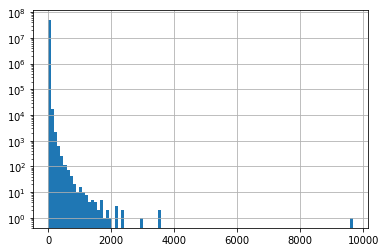

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

listen_count[2].hist(ax=ax, bins=100)
ax.set_yscale('log')

Text(0, 0.5, 'Occurrence')

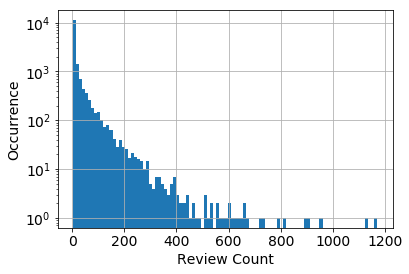

In [11]:
import json

biz_file = open('/home/edvard/Downloads/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [13]:
import numpy as np

large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897,44, 28, 7971, 926, 122, 22222]
np.sort(large_counts)

array([    3,    28,    44,    80,   122,   296,   725,   867,   926,
        2215,  7689,  7971,  8286, 11495, 22222, 64011, 91897])

In [16]:
import pandas as pd
print (large_counts)
pd.qcut(large_counts, 2, labels=False)

[296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]


array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [18]:
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.5])

0.5    926.0
dtype: float64

Text(0, 0.5, 'Occurrence')

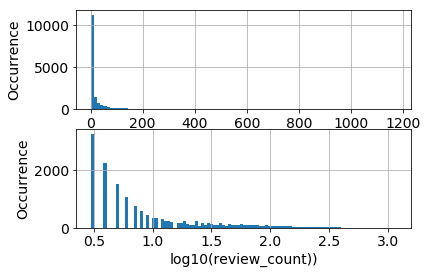

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

np.log10(biz_df['review_count']).hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

In [25]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']],biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']],biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)"% (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00179 (+/- 0.00417)
R-squared score with log transform: 0.00069 (+/- 0.00585)


In [26]:
df = pd.read_csv('/home/edvard/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')

/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [29]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']],df['shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']],df['shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)"% (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)"% (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


Text(0, 0.5, 'Number of Shares')

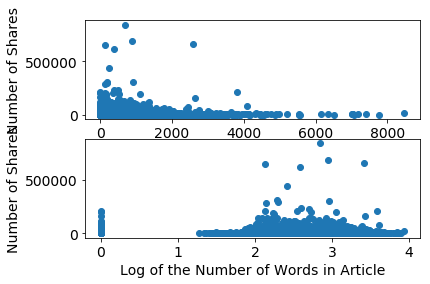

In [30]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

Text(0, 0.5, 'Average Star Rating')

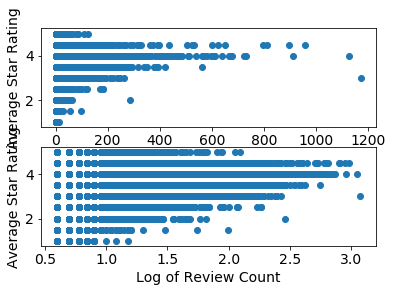

In [31]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

### Box-Cox

In [34]:
from scipy import stats
biz_df['review_count'].min()

3

In [40]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

biz_df['rc_log'] = rc_log
biz_df['rc_bc'] = rc_bc

Text(0, 0.5, 'Occurrence')

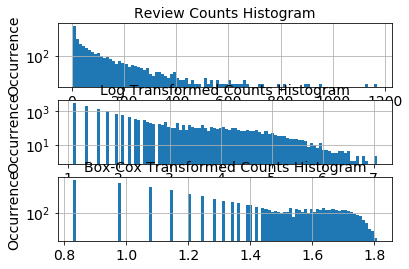

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

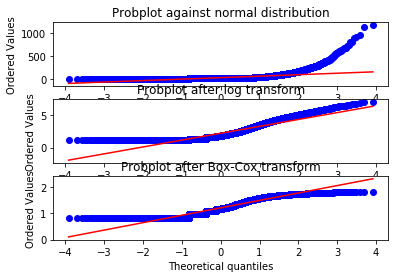

In [42]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

## Normalization

### min-max standard l2

/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/edvard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Meth

Text(27.125, 0.5, 'Number of articles')

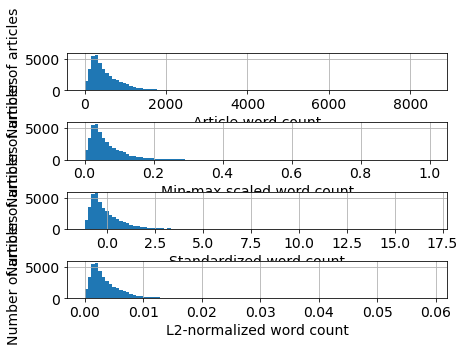

In [45]:
import pandas as pd
import sklearn.preprocessing as preproc

df = pd.read_csv('/home/edvard/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')
df['n_tokens_content'].as_matrix()
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].as_matrix()
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].as_matrix()
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].as_matrix()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)